In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_excel('Wine.xls')

In [4]:
df.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [5]:
df.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,A,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,A,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,A,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,A,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,A,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [6]:
df.shape

(178, 14)

In [7]:
df['Type'].value_counts()

B    71
A    59
C    48
Name: Type, dtype: int64

In [8]:
df['Type'].replace({'A':0,'B':1,'C':2},inplace=True)

In [9]:
df.head()

,Type,Alcohol,Malic_Acid,Ash,Ash_Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280_OD315,Proline
0,0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


### Correlation :

In [10]:
df.corr()['Type']

Type                    1.000000
Alcohol                -0.328222
Malic_Acid              0.437776
Ash                    -0.049643
Ash_Alcalinity          0.517859
Magnesium              -0.209179
Total_Phenols          -0.719163
Flavanoids             -0.847498
Nonflavanoid_Phenols    0.489109
Proanthocyanins        -0.499130
Color_Intensity         0.265668
Hue                    -0.617369
OD280_OD315            -0.788230
Proline                -0.633717
Name: Type, dtype: float64

## Checking the Statistical dependence of each column with the target column :

In [11]:
Type_0 = df[df['Type']==0]
Type_1 = df[df['Type']==1]
Type_2 = df[df['Type']==2]

In [12]:
X=df.drop('Type',axis=1)
y=df['Type']

In [13]:
from scipy.stats import f_oneway

In [14]:
for col in X.columns:
    pvalue = f_oneway(Type_0[col],Type_1[col],Type_2[col])[1]
    print(col,":",pvalue)

Alcohol : 3.319503795619655e-36
Malic_Acid : 4.127228798041834e-14
Ash : 4.149967974793239e-06
Ash_Alcalinity : 9.444472938826817e-14
Magnesium : 8.963395439251042e-06
Total_Phenols : 2.1376700154385954e-28
Flavanoids : 3.5985858307136404e-50
Nonflavanoid_Phenols : 3.88804090047893e-11
Proanthocyanins : 5.125358737546706e-12
Color_Intensity : 1.162008021927618e-33
Hue : 5.9176622163620664e-30
OD280_OD315 : 1.393104956942896e-44
Proline : 5.783168356105498e-47


All the features columns are significant.

### Scaling the data

In [15]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

### Importing Libraries from sklearn :

In [16]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import cross_val_score

### Logistic Regression and Naive Bayes :

In [17]:
LR=LogisticRegression()
NB=GaussianNB()

### KNN

Finding the best k value

In [18]:
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
param={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
GS=GridSearchCV(knn,param,cv=3,scoring='f1_weighted')
GS.fit(X,y)

C:\Users\Prabhakaran\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1_weighted', verbose=0)

In [19]:
GS.best_params_

{'n_neighbors': 43, 'weights': 'distance'}

In [20]:
KNN=KNeighborsClassifier(n_neighbors= 43, weights= 'distance')

In [21]:
KNN.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=43, p=2,
                     weights='distance')

### Decision Tree

In [22]:
DT=DecisionTreeClassifier(random_state=0)
param={ 'criterion' : ['gini','entropy'],'max_depth' : np.arange(1,10) }
GS=GridSearchCV(DT,param,cv=3,scoring='f1_weighted')
GS.fit(X,y)

C:\Users\Prabhakaran\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
     

In [23]:
GS.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [24]:
DT=DecisionTreeClassifier(criterion='gini',max_depth= 4)
scores = cross_val_score(DT, X,y, cv=3, scoring='f1_weighted')

### RandomForest

In [25]:
RF_var = []
for val in np.arange(1,50):
    RF = RandomForestClassifier(criterion='entropy',n_estimators=val,random_state=0)
    scores = cross_val_score(RF,X,y,cv=3,scoring = 'f1_weighted')
    RF_var.append(np.var(scores,ddof=1))

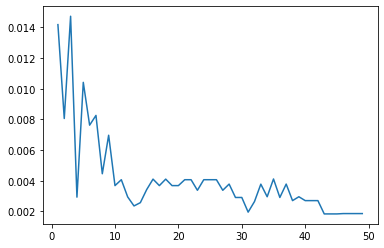

In [26]:
plt.plot(np.arange(1,50),RF_var)

### Bagging Classifier

In [27]:
Bag=BaggingClassifier()

bag_var = []
for val in np.arange(1,100):
    bag = BaggingClassifier(n_estimators=val,random_state=0)
    scores = cross_val_score(bag,X,y,cv=3,scoring = 'f1_weighted')
    bag_var.append(np.var(scores,ddof=1))

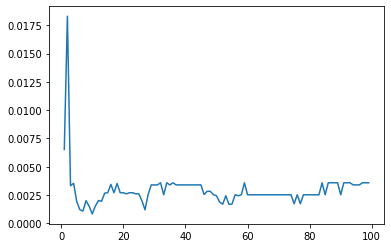

In [28]:
plt.plot(np.arange(1,100),bag_var)

### Adaboost

In [ ]:
ab_mean = []
for val in np.arange(1,100):
    ab = AdaBoostClassifier(n_estimators=val,random_state=0)
    scores = cross_val_score(ab,X,y,cv=3,scoring = 'f1_weighted')
    ab_mean.append(1-np.mean(scores))

In [ ]:
plt.plot(np.arange(1,10),ab_mean[0:9])

### Gradient Boosting

In [ ]:
gb_mean = []
for val in np.arange(1,100):
    GB = GradientBoostingClassifier(n_estimators=val,random_state=0)
    scores = cross_val_score(GB,X,y,cv=3,scoring = 'f1_weighted')
    gb_mean.append(1-np.mean(scores))

In [ ]:
plt.plot(np.arange(1,100),gb_mean)

### Stacking

In [ ]:
stacked=VotingClassifier(estimators=[('Logistic',LR),
                                     ('RandomForest',RF),
                                     ('GBoost',GB)], voting='soft')

## Comparing all algorithms

In [ ]:
KNN=KNeighborsClassifier(n_neighbors= 43, weights= 'distance')
DT=DecisionTreeClassifier(criterion='entropy',random_state=0)
RF=RandomForestClassifier(n_estimators=11,criterion='entropy',random_state=0)
Bag=BaggingClassifier(n_estimators=26,random_state=0)
AB=AdaBoostClassifier(n_estimators=3,random_state=0)
AB_Log=AdaBoostClassifier(base_estimator=LR,n_estimators=3)
GB=GradientBoostingClassifier(n_estimators=63)

In [ ]:
models=[]
models.append(('Logistic',LR))
models.append(('Naive Bayes',NB))
models.append(('KNN',KNN))
models.append(('DT',DT))
models.append(('RF',RF))
models.append(('Bagging',Bag))
models.append(('AdaBoost',AB))
models.append(('AdaBoost_Log',AB_Log))
models.append(('Gradient Boost',GB))

results=[]
names=[]

for name,model in models:
    scores = cross_val_score(model, X,y, cv=3, scoring='f1_weighted')
    results.append(scores)
    names.append(name)

chart = sns.boxplot(names,results)
chart.set_xticklabels(chart.get_xticklabels(),rotation=45)
plt.title('Algorithmn comparison')
plt.show()